<a href="https://colab.research.google.com/github/AvniKal/Data-Analysis-ML-models-Google-Colab/blob/main/dataset(demo_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

With the help of Pandas, Numpy and Matplotlib, find answers for the below questions:



Product Insights

 1.⁠ ⁠Which category has the most number of products listed?
“Are electronics more in number or fashion or furniture?”


 2.⁠ ⁠Which product category gives the highest average discount?
“Where are customers getting the most savings – mobiles, clothes, or home appliances?”


 3.⁠ ⁠Is there a relation between rating and discount?
“Do people give high ratings if the discount is more?”


 4.⁠ ⁠What are the top 10 most expensive products (by actual price)?
“Which products cost the most without discount?”


 5.⁠ ⁠Which products have the biggest discount percentage?
“Let’s find the best deals!”


 6.⁠ ⁠Which products have the highest number of reviews?
“Which products are trending or most talked about?”


 7.⁠ ⁠What is the average rating of products in each category?
“Do electronics get better ratings than fashion or toys?”


 8.⁠ ⁠Are higher-priced products getting better reviews or not?
“Expensive doesn't always mean better – let's see!”


 9.⁠ ⁠Are long reviews (review_content) mostly given for high-rated products?
“Do people write more when they love something?”


10.⁠ ⁠Do more discounts bring more reviews?
“Are offers attracting more opinions?"

11.⁠ ⁠Which users have written the most reviews?
“Are there super-reviewers on the platform?”


12.⁠ ⁠Do some users rate everything very highly or very badly?
“Are they biased or honest?”


13.⁠ ⁠Is there a pattern in user names and reviews?
“Are real-name users more genuine in their reviews?”

14.⁠ ⁠Are products with images getting better ratings?
“Is image quality influencing customer opinion?”


15.⁠ ⁠Are there broken or missing image/product links?
“Let’s check data quality – very important for any business.”



---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
ds=pd.read_csv('amazon.csv')



---




1)⁠Which category has the most number of products listed? “Are electronics more in number or fashion or furniture?”

In [ ]:
ds.groupby('category').size()

,0
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,1
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,1
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,2
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",2
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",2
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",2


In [ ]:
ds['category'].value_counts().head(10)

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24


In [ ]:
ds['category'].value_counts().max()

233

In [ ]:
ds['category'].value_counts().idxmax()

'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'

In [ ]:
ds['category'] = ds['category'].astype(str).fillna('')
ds['main_category'] = ds['category'].str.split('|').str[0]
ds['main_category'] = ds['main_category'].str.strip()
print(ds['main_category'].head().to_string())

0    Computers&Accessories
1    Computers&Accessories
2    Computers&Accessories
3    Computers&Accessories
4    Computers&Accessories


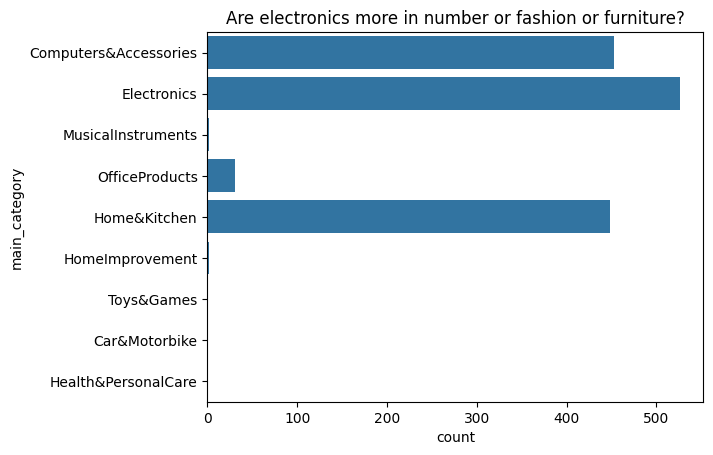

In [ ]:
#sns.histplot(ds['main_category'])
sns.countplot(ds['main_category'])
plt.title('Are electronics more in number or fashion or furniture?')
plt.show()

                                     

---



2)⁠Which product category gives the highest average discount? “Where are customers getting the most savings – mobiles, clothes, or home appliances?”

In [ ]:
ds['discount_percentage'] = ds['discount_percentage'].str.replace('%', '').astype(float)
ds.groupby('category')[['discount_percentage']].mean()

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,46.5
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",5.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",17.5


In [ ]:
ds.groupby('category')[['discount_percentage']].mean().idxmax()

,0
discount_percentage,Computers&Accessories|Accessories&Peripherals|...


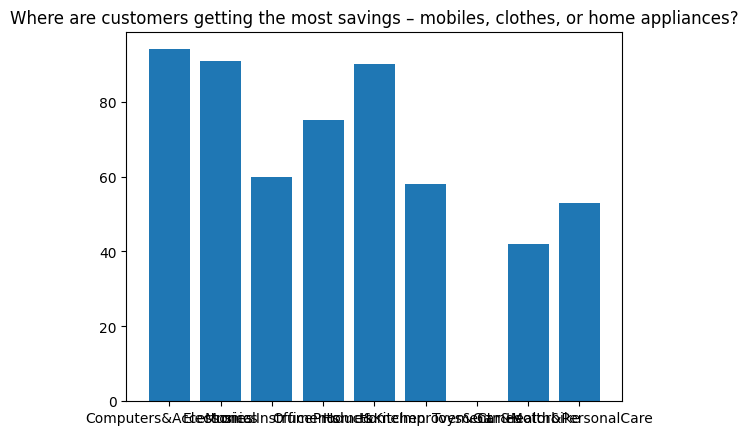

In [ ]:
plt.bar(ds['main_category'],ds['discount_percentage'])
plt.title('Where are customers getting the most savings – mobiles, clothes, or home appliances?')
plt.show()



---



3) ⁠Is there a relation between rating and discount? “Do people give high ratings if the discount is more?”

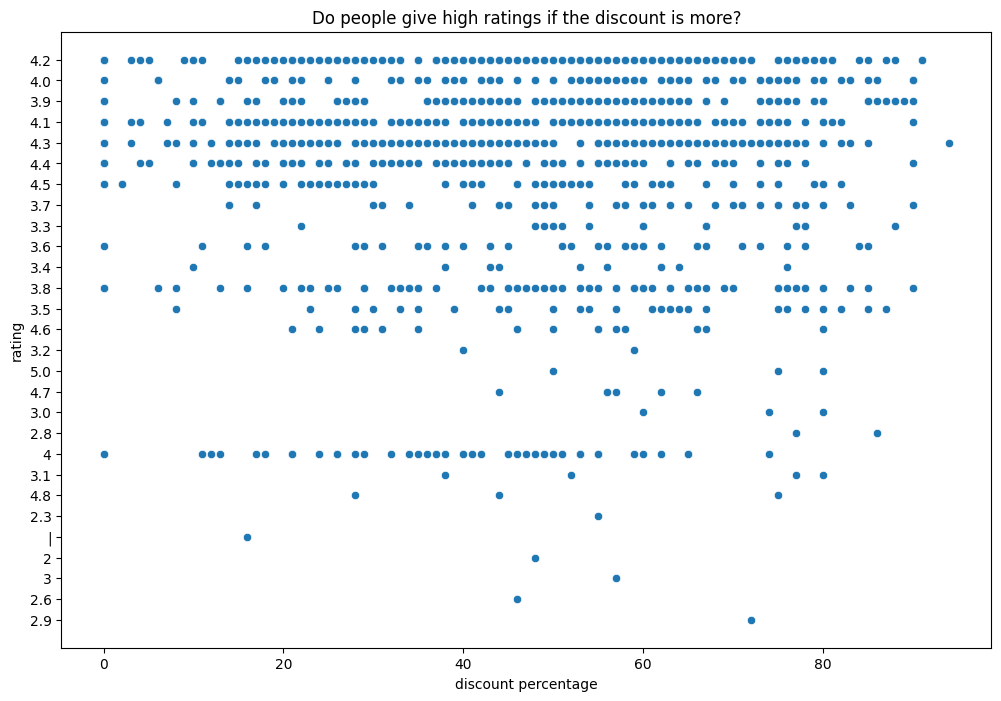

In [ ]:
#plt.scatter(ds['discount_percentage'],ds['rating'])
plt.figure(figsize=(12,8))
sns.scatterplot(x='discount_percentage', y='rating', data=ds)
plt.title('Do people give high ratings if the discount is more?')
plt.xlabel('discount percentage')
plt.ylabel('rating')
plt.show()



---



4)⁠ ⁠What are the top 10 most expensive products (by actual price)? “Which products cost the most without discount?”

In [ ]:
ds.groupby('product_name')[['actual_price']].max().head(10)

,actual_price
product_name,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,"₹1,599"
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,"₹1,599"
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor","₹1,899"
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","₹2,399"
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",₹175
"3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)",₹165
"4 in 1 Handheld Electric Vegetable Cutter Set,Wireless Food Processor Electric Food Chopper for Garlic Chili Pepper Onion Ginger Celery Meat with Brush","₹1,200"
7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,"₹1,999"
7SEVEN® Bluetooth Voice Command Remote for Xiaomi Redmi Mi Smart TV with Netflix & Prime Video Hot Keys XMRM-00A,"₹1,999"


In [ ]:
ds.groupby('product_name')[['actual_price']].max().sort_values('actual_price',ascending=False).head(10)

,actual_price
product_name,
"Wayona USB Type C 65W Fast Charging 2M/6Ft Long Flash Charge Cable 3A QC 3.0 Data Cable Compatible with Samsung Galaxy S21 S10 S9 S8, iQOO Z3, Vivo, Note 10 9 8, A20e A40 A50 A70, Moto G7 G8 (2M, Grey)",₹999
"SOFLIN Egg Boiler Electric Automatic Off 7 Egg Poacher for Steaming, Cooking, Boiling and Frying (400 Watts, Blue)",₹999
"Zebronics, ZEB-NC3300 USB Powered Laptop Cooling Pad with Dual Fan, Dual USB Port and Blue LED Lights",₹999
"JBL C50HI, Wired in Ear Headphones with Mic, One Button Multi-Function Remote, Lightweight & Comfortable fit (Black)",₹999
Lapster USB 3.0 A to Micro B SuperSpeed for hard disk cable - short cable,₹999
"LAPSTER 12pcs Spiral Cable Protectors for Charger, Wires, Data Charger Cable Protector for Computers, Cell Phones etc.(Grey)",₹999
Prolet Classic Bumper Case Cover for Samsung Galaxy Watch 4 44mm TPU Plated Full Screen Protector (Black),₹999
Zebronics Zeb-Companion 107 USB Wireless Keyboard and Mouse Set with Nano Receiver (Black),₹999
"Amazon Basics Magic Slate 8.5-inch LCD Writing Tablet with Stylus Pen, for Drawing, Playing, Noting by Kids & Adults, Black",₹999




---



 5) ⁠Which products have the biggest discount percentage? “Let’s find the best deals!”

In [ ]:
ds.groupby('product_name')[['discount_percentage']].max().sort_values('discount_percentage',ascending=False).head(10)

,discount_percentage
product_name,
"rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver",94.0
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",91.0
Sounce Protective Case Cover Compatible Boat Xtend Overall Protective Case TPU HD Clear Ultra-Thin Cover with Unbreakable Screen Guard,90.0
"Silicone Rubber Earbuds Tips, Eartips, Earpads, Earplugs, for Replacement in Earphones and Bluetooth Medium Size (10 Pcs Black)",90.0
beatXP Kitchen Scale Multipurpose Portable Electronic Digital Weighing Scale | Weight Machine With Back light LCD Display | White |10 kg | 2 Year Warranty |,90.0
"LAPSTER 12pcs Spiral Cable Protectors for Charger, Wires, Data Charger Cable Protector for Computers, Cell Phones etc.(Grey)",90.0
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",90.0
Sounce Spiral Charger Cable Protector Data Cable Saver Charging Cord Protective Cable Cover Headphone MacBook Laptop Earphone Cell Phone Set of 3 (Cable Protector (12 Units)),90.0
LAPSTER Spiral Charger Spiral Charger Cable Protectors for Wires Data Cable Saver Charging Cord Protective Cable Cover Set of 3 (12 Pieces),90.0




---



6⁠) Which products have the highest number of reviews? “Which products are trending or most talked about?”

In [ ]:
ds['rating_count'] = pd.to_numeric(ds['rating_count'], errors='coerce')
ds.groupby('product_name')[['rating_count']].sum().sort_values('rating_count',ascending=False).head(15)

,rating_count
product_name,
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",2445.0
"Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)",1948.0
"Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)",1806.0
"Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White",1312.0
"Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/ 9RT/ 10R/ Nord & for All Type C Devices – Red, 1 Meter",1151.0
"SWAPKART Fast Charging Cable and Data Sync USB Cable Compatible for iPhone 6/6S/7/7+/8/8+/10/11, 12, 13 Pro max iPad Air/Mini, iPod and iOS Devices (White)",1072.0
"Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)",992.0
Eveready Red 1012 AAA Batteries - Pack of 10,989.0
"Pigeon 1.5 litre Hot Kettle and Stainless Steel Water Bottle Combo used for boiling Water, Making Tea and Coffee, Instant Noodles, Soup, 1500 Watt with Auto Shut- off Feature - (Silver)",976.0




---



7) ⁠What is the average rating of products in each category? “Do electronics get better ratings than fashion or toys?”

In [ ]:
ds['rating']=pd.to_numeric(ds['rating'],errors='coerce')
ds.groupby('category')[['rating']].mean()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000




---



 8)⁠Are higher-priced products getting better reviews or not? “Expensive doesn't always mean better – let's see!”

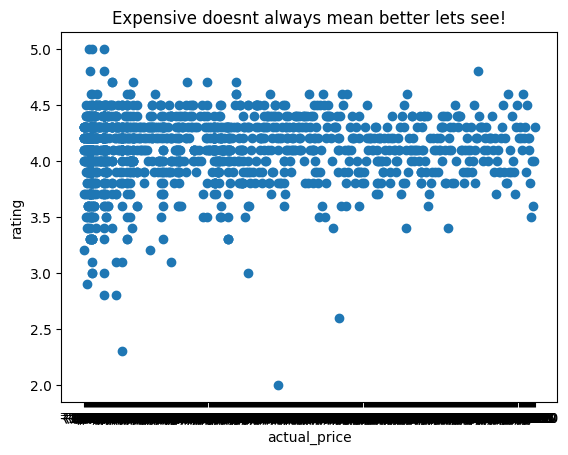

In [ ]:
plt.scatter(ds['actual_price'],ds['rating']) # use bar or some other graph
plt.title('Expensive doesnt always mean better lets see!')
plt.xlabel('actual_price')
plt.ylabel('rating')
plt.show()



---



9) Are long reviews (review_content) mostly given for high-rated products? “Do people write more when they love something?”

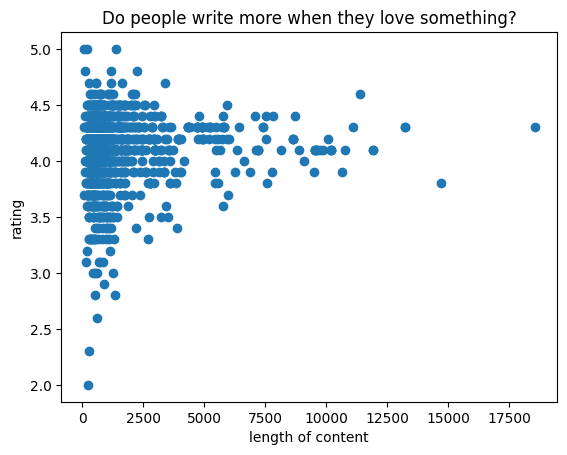

In [ ]:
length_of_content=[]
for i in ds['review_content']:
     length_of_content.append(len(i))
plt.scatter(length_of_content,ds['rating'])
plt.title('Do people write more when they love something?')
plt.xlabel('length of content')
plt.ylabel('rating')
plt.show()



---



10) Do more discounts bring more reviews? “Are offers attracting more opinions?"

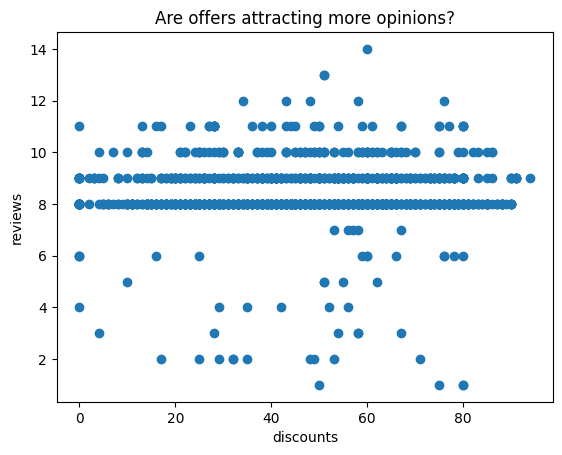

In [ ]:
reviews=[]
for i in ds['review_title']:
     b=i.split(',')
     reviews.append(len(b))
plt.scatter(ds['discount_percentage'],reviews)
plt.title('Are offers attracting more opinions?')
plt.xlabel('discounts')
plt.ylabel('reviews')
plt.show()



---



11) Which users have written the most reviews? “Are there super-reviewers on the platform?”

In [ ]:
reviewers = []
for i in ds['user_name']:
    reviewers.append(j)

# Create a pandas Series from the reviewers list and get the value counts
reviewer_counts = pd.Series(reviewers).value_counts().sort_values(ascending=False)

# Sort the counts and display the top users
print("Users with the most reviews:")
display(reviewer_counts.head(10))

NameError: name 'j' is not defined

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(reviewer_counts.index[1:11],reviewer_counts.values[1:11])
plt.xlabel('username')
plt.ylabel('number of reviews')
plt.title('Are there super-reviewers on the platform?')
plt.show()



---



12) ⁠Do some users rate everything very highly or very badly? “Are they biased or honest?”

In [ ]:
ds['user_name'] = ds['user_name'].str.split(',')
# convert the list to different rows
ds = ds.explode('user_name')
ds['user_name'] = ds['user_name'].str.strip()
# convert rating to numeric type
ds['rating']=pd.to_numeric(ds['rating'],errors='coerce')

user_stats = ds.groupby('user_name')['rating'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()
user_stats.columns = ['user_name', 'review_count', 'avg_rating', 'std_rating', 'min_rating', 'max_rating']
# print(pd.DataFrame(user_stats))
# std is how myuch their ratings vary
low_raters = user_stats[(user_stats['avg_rating'] <= 2.5) & (user_stats['std_rating'] == 0)]
high_raters = user_stats[(user_stats['avg_rating'] >= 4.5) & (user_stats['std_rating'] == 0)]
print("Low raters:")
print(low_raters.head())
print("\nHigh raters:")
print(high_raters.head())

Low raters:
Empty DataFrame
Columns: [user_name, review_count, avg_rating, std_rating, min_rating, max_rating]
Index: []

High raters:
             user_name  review_count  avg_rating  std_rating  min_rating  \
486               Alok             2         4.5         0.0         4.5   
542     Amazon_Shopper             3         4.5         0.0         4.5   
742  Ankit Kumar Singh             2         4.5         0.0         4.5   
785     Anoop Chandran             2         4.5         0.0         4.5   
808         Anthony S.             2         4.6         0.0         4.6   

     max_rating  
486         4.5  
542         4.5  
742         4.5  
785         4.5  
808         4.6  




---



13) ⁠Is there a pattern in user names and reviews? “Are real-name users more genuine in their reviews?”

In [ ]:
ds['user_name'] = ds['user_name'].str.split(',')
ds = ds.explode('user_name')
ds['user_name'] = ds['user_name'].str.strip()
# plot chart
ds['review_length'] = ds['review_content'].astype(str).str.len()
ds.groupby('user_name')[['rating', 'review_length']].mean().sort_values('rating',ascending=False).head(20)

,rating,review_length
user_name,,
kanta,5.0,208.0
harpreet singh,5.0,1399.0
kamal sahota,5.0,208.0
Rambeer kumar,5.0,1399.0
Abdul Gafur,5.0,86.0
Digambar Shelke,5.0,1399.0
mahima,5.0,1399.0
luvsmplcty,5.0,208.0
Rajat Semwal,5.0,1399.0




---



14)⁠Are products with images getting better ratings? “Is image quality influencing customer opinion?”

In [ ]:
ds['has_image']=np.where(ds['img_link'].notna() & ds['img_link'].str.strip()!='',"true","false")
#ds['has_image'].value_counts(dropna=False)
result=ds.groupby('has_image')[['rating']].mean()
result = result.reindex(['true', 'false'])
print(result)



---



 15)⁠Are there broken or missing image/product links? “Let’s check data quality – very important for any business.”

In [ ]:
#missing image links
missing_image=ds['img_link'].isna() | (ds['img_link'].str.strip=='')
print("missing image:",missing_image.sum())

# missing product links
missing_product=ds['product_link'].isna() | (ds['product_link'].str.strip=='')
print("missing product link:",missing_product.sum())

# broken iamge
import requests

def check_url(url):
  try:
    response=requests.head(url,timeout=5)
    return response.status_code==200
  except:
    return False
ds['is_image_broken'] = ds['img_link'].apply(check_url)
print(ds['is_image_broken'].value_counts())